### importing libraries

In [3]:
# Importing libraries (pandas, numpy, os)
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import scipy

### importing data frames

In [5]:
# import the df_clean_fix.pkl data
df_final_table = pd.read_pickle(os.path.join(path,'df_clean_fix.pkl'))

### checking final data frames before combining with df_customers

In [6]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 28 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   order_id                int64   
 2   user_id                 int64   
 3   eval_set                object  
 4   order_number            int64   
 5   order_dow               int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   First Name              object  
 9   Surnam                  object  
 10  Gender                  object  
 11  STATE                   object  
 12  Age                     int64   
 13  date_joined             object  
 14  n_dependants            int64   
 15  fam_status              object  
 16  income                  int64   
 17  _merge                  category
 18  product_id              int64   
 19  add_to_cart_order       int64   
 20  reordered               int64   
 21  merge_

In [7]:
df_final_table.isnull().sum()

Unnamed: 0_x                    0
order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2076201
First Name                1775189
Surnam                          0
Gender                          0
STATE                           0
Age                             0
date_joined                     0
n_dependants                    0
fam_status                      0
income                          0
_merge                          0
product_id                      0
add_to_cart_order               0
reordered                       0
merge_indicator                 0
Unnamed: 0_y                    0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
merge_indicator_2               0
dtype: int64

### optimizing data frame

In [8]:
# delete 'Unnamed:0' columne
df_final_table.drop('Unnamed: 0_y', axis=1, inplace=True)

In [9]:
# delete '_merge` columne
df_final_table.drop('_merge', axis=1, inplace=True)

In [10]:
# delete 'merge_indicator' columne
df_final_table.drop('merge_indicator', axis=1, inplace=True)

In [11]:
# delete 'merge_indicator_2' columne
df_final_table.drop('merge_indicator_2', axis=1, inplace=True)

In [12]:
# change columne 'order_dow' name
df_final_table = df_final_table.rename(columns={'order_dow':'order_day_of_week'})

In [13]:
# change data type
df_final_table['Gender'] = df_final_table['Gender'].astype('category')

In [14]:
# change columne name
df_final_table = df_final_table.rename(columns={'Age': 'age', 'STATE': 'state', 'Surnam' : 'surname', 'First Name':'first_name'})

In [15]:
# change columne name
df_final_table = df_final_table.rename(columns={'Gender': 'gender'})

### creating flags

#### create 'max_order_flag'

In [16]:
# using the transform function to generate the maximum orders for each user
df_final_table['max_order_flag'] = df_final_table.groupby(['user_id'])['order_number'].transform(np.max)

In [17]:
# Check if there is a new column
df_final_table.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_name,surname,...,fam_status,income,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order_flag
0,0,2539329,1,prior,1,2,8,NaN,Linda,Nguyen,...,married,40423,196,1,0,Soda,77,7,9.0,10
1,1,2398795,1,prior,2,3,7,15.0,Linda,Nguyen,...,married,40423,196,1,1,Soda,77,7,9.0,10
2,2,473747,1,prior,3,3,12,21.0,Linda,Nguyen,...,married,40423,196,1,1,Soda,77,7,9.0,10
3,3,2254736,1,prior,4,4,7,29.0,Linda,Nguyen,...,married,40423,196,1,1,Soda,77,7,9.0,10
4,4,431534,1,prior,5,4,15,28.0,Linda,Nguyen,...,married,40423,196,1,1,Soda,77,7,9.0,10


#### create 'mean_price_flag'

In [18]:
# using the transform function to to generate the mean prices for each user
df_final_table['mean_order_flag'] = df_final_table.groupby(['user_id'])['prices'].transform(np.mean)

#### create 'price_range_flag'

In [19]:
# if- statement to category individual prices
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range product'
  else: return 'Not enough data'

In [20]:
# add a new columne price_label
df_final_table['price_range_flag'] = df_final_table.apply(price_label, axis=1)

#### create 'busiest_days_flag'

In [21]:
# count the days which day most orders take place
df_final_table['order_day_of_week'].value_counts(dropna = False)

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: order_day_of_week, dtype: int64

In [22]:
# create a new columne for “Busiest day,” “Least busy day,” and “Regularly busy day.” 
result = []

for value in df_final_table["order_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [23]:
# adding the list result to the dataframe
df_final_table['busiest_day'] = result

In [24]:
# counting the entries
df_final_table['busiest_day'].value_counts(dropna = False)

Regularly busy    22417684
Busiest day        6204404
Least busy         3783953
Name: busiest_day, dtype: int64

#### create 'busiest_period_of_the_flag'

In [25]:
# count the hours which day most orders take place
df_final_table['order_hour_of_day'].value_counts(dropna = False)

10    2761862
11    2736242
14    2689251
15    2662246
13    2661057
12    2618613
16    2535313
9     2454273
17    2087721
8     1718182
18    1636566
19    1258352
20     976182
7      891082
21     795658
22     634247
23     402335
6      290500
0      218786
1      115706
5       87964
2       69377
4       53245
3       51281
Name: order_hour_of_day, dtype: int64

In [26]:
# create a new columne for “Most orders,” “Average orders,” and “Fewest orders 
result_hour = []
for value in df_final_table["order_hour_of_day"]:
    if value in [10, 11, 14, 15, 13, 12, 16, 9]:
        result_hour.append("Most orders")
    elif value in [17, 8, 18, 19, 20, 7, 21, 22]:
        result_hour.append("Average orders")
    else:
        result_hour.append("Fewest orders")  

In [27]:
# adding the list result_hour to the dataframe
df_final_table['busiest_period_of_day'] = result_hour

In [28]:
df_final_table['busiest_period_of_day'].value_counts(dropna = False)

Most orders       21118857
Average orders     9997990
Fewest orders      1289194
Name: busiest_period_of_day, dtype: int64

#### create 'max_order_flag'

In [29]:
# using the  transform function to generate the maximum orders for each user
df_final_table['max_order'] = df_final_table.groupby(['user_id'])['order_number'].transform(np.max)

In [30]:
# defining a function for the customer who ordered the most
df_final_table.loc[df_final_table['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [31]:
# defining a function for the customer who ordered the moderat
df_final_table.loc[(df_final_table ['max_order'] <= 40) & 
                   (df_final_table ['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [32]:
# defining a function for the customer who ordered the least
df_final_table.loc[df_final_table['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [33]:
# print the frequency of your new “loyalty_flag” 
df_final_table['loyalty_flag'].value_counts(dropna = False)

Regular customer    15877395
Loyal customer      10284396
New customer         6244250
Name: loyalty_flag, dtype: int64

#### create 'spending_flag'

In [34]:
# defining a function for mean of the prices of products purchased by a user is high or low spender
df_final_table.loc[df_final_table['mean_order_flag'] > 10, 'spending_flag'] = 'High spender'

In [35]:
# defining a function for mean of the prices of products purchased by a user is high or low spender
df_final_table.loc[df_final_table['mean_order_flag'] <= 10, 'spending_flag'] = 'Low spender'

In [36]:
# print the frequency of your new “spending_flag” 
df_final_table ['spending_flag'].value_counts(dropna = False)

Low spender     32286726
High spender      119315
Name: spending_flag, dtype: int64

#### creating a 'frequency flag'

In [37]:
# using the transform function to to generate the median for the days_since_prior_order
df_final_table['median_prior_orders'] = df_final_table.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [38]:
# defining a function for median of “days_since_prior_order” is higher than 20
df_final_table.loc[df_final_table['median_prior_orders'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [39]:
# defining a function for median of “days_since_prior_order” is higher than 10 and lower or equal 20
df_final_table.loc[(df_final_table['median_prior_orders'] > 10) & (df_final_table['median_prior_orders'] <= 20),'frequency_flag'] = 'Regular customer'

In [40]:
# defining a function for median of “days_since_prior_order” is higher than 20
df_final_table.loc[df_final_table['median_prior_orders'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [41]:
# print the frequency of your new “frequency_flag” 
df_final_table ['frequency_flag'].value_counts(dropna = False)

Frequent customer        21560324
Regular customer          7209005
Non-frequent customer     3636707
NaN                             5
Name: frequency_flag, dtype: int64

In [42]:
# finding the 5 NaN
df_NaN_frequency_flag =df_final_table[df_final_table['frequency_flag'].isnull()==True]

In [43]:
df_NaN_frequency_flag

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_name,surname,...,max_order_flag,mean_order_flag,price_range_flag,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_flag,median_prior_orders,frequency_flag
13645692,2655584,895835,159838,prior,1,0,17,NaN,Jason,Nava,...,1,7.42,Mid-range product,Busiest day,Average orders,1,New customer,Low spender,NaN,NaN
17251990,2655584,895835,159838,prior,1,0,17,NaN,Jason,Nava,...,1,7.42,Mid-range product,Busiest day,Average orders,1,New customer,Low spender,NaN,NaN
17622767,2655584,895835,159838,prior,1,0,17,NaN,Jason,Nava,...,1,7.42,Low-range product,Busiest day,Average orders,1,New customer,Low spender,NaN,NaN
24138593,2655584,895835,159838,prior,1,0,17,NaN,Jason,Nava,...,1,7.42,Mid-range product,Busiest day,Average orders,1,New customer,Low spender,NaN,NaN
25881080,2655584,895835,159838,prior,1,0,17,NaN,Jason,Nava,...,1,7.42,Low-range product,Busiest day,Average orders,1,New customer,Low spender,NaN,NaN


In [44]:
# order the colmns in a new order
desired_order = ['order_id','product_id','product_name','prices','department_id','order_number','order_day_of_week','order_hour_of_day', 'days_since_prior_order',
                'add_to_cart_order', 'user_id', 'date_joined','first_name','surname','gender','age', 'fam_status','n_dependants','income','state',
                 'busiest_period_of_day','busiest_day', 'price_range_flag' , 'reordered', 'max_order_flag', 'loyalty_flag', 'mean_order_flag',
                'spending_flag', 'median_prior_orders', 'frequency_flag','aisle_id', 'eval_set']

In [45]:
# order the colmns in a new order
df_final_table = df_final_table[desired_order]

In [46]:
df_final_table.isnull().sum()

order_id                        0
product_id                      0
product_name                    0
prices                          0
department_id                   0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    2076201
add_to_cart_order               0
user_id                         0
date_joined                     0
first_name                1775189
surname                         0
gender                          0
age                             0
fam_status                      0
n_dependants                    0
income                          0
state                           0
busiest_period_of_day           0
busiest_day                     0
price_range_flag                0
reordered                       0
max_order_flag                  0
loyalty_flag                    0
mean_order_flag                 0
spending_flag                   0
median_prior_orders             5
frequency_flag

#### crossstab new data frame

In [47]:
# a crosstab between the “days_since_prior_order” column and the “order_number” column 
# The table this creates will be stored in the object crosstab.
crosstab = pd.crosstab(df_final_table['days_since_prior_order'], df_final_table ['order_number'], dropna = False)

In [48]:
# run this and the data is stored in computer memory to be copied into a another programm
crosstab.to_clipboard()

#### df check 

In [49]:
df_final_table.head()

,order_id,product_id,product_name,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,price_range_flag,reordered,max_order_flag,loyalty_flag,mean_order_flag,spending_flag,median_prior_orders,frequency_flag,aisle_id,eval_set
0,2539329,196,Soda,9.0,7,1,2,8,NaN,1,...,Mid-range product,0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior
1,2398795,196,Soda,9.0,7,2,3,7,15.0,1,...,Mid-range product,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior
2,473747,196,Soda,9.0,7,3,3,12,21.0,1,...,Mid-range product,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior
3,2254736,196,Soda,9.0,7,4,4,7,29.0,1,...,Mid-range product,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior
4,431534,196,Soda,9.0,7,5,4,15,28.0,1,...,Mid-range product,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior


In [50]:
df_final_table.describe()

,order_id,product_id,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,user_id,age,n_dependants,income,reordered,max_order_flag,mean_order_flag,median_prior_orders,aisle_id
count,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.032984e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07,3.240604e+07
mean,1.710745e+06,2.559895e+04,7.790148e+00,9.919923e+00,1.714223e+01,2.738862e+00,1.342515e+01,1.110410e+01,8.352616e+00,1.029371e+05,4.946525e+01,1.501891e+00,9.943761e+04,5.895845e-01,3.305203e+01,7.790148e+00,1.039789e+01,7.119773e+01
std,9.872986e+05,1.408389e+04,4.242055e+00,6.281418e+00,1.753527e+01,2.090074e+00,4.246382e+00,8.779062e+00,7.127128e+00,5.946610e+04,1.848557e+01,1.118866e+00,4.305710e+04,4.919092e-01,2.515518e+01,7.347909e-01,7.131767e+00,3.821182e+01
min,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.559480e+05,1.354400e+04,4.200000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,5.142200e+04,3.300000e+01,1.000000e+00,6.700200e+04,0.000000e+00,1.300000e+01,7.377725e+00,6.000000e+00,3.100000e+01
50%,1.711050e+06,2.530500e+04,7.400000e+00,9.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.026150e+05,4.900000e+01,2.000000e+00,9.661700e+04,1.000000e+00,2.600000e+01,7.811173e+00,8.000000e+00,8.300000e+01
75%,2.565497e+06,3.794700e+04,1.130000e+01,1.600000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.543880e+05,6.500000e+01,3.000000e+00,1.279120e+05,1.000000e+00,4.700000e+01,8.228626e+00,1.300000e+01,1.070000e+02
max,3.421083e+06,4.968800e+04,2.500000e+01,2.100000e+01,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,1.000000e+00,9.900000e+01,2.320000e+01,3.000000e+01,1.340000e+02


In [51]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   product_name            object  
 3   prices                  float64 
 4   department_id           int64   
 5   order_number            int64   
 6   order_day_of_week       int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   add_to_cart_order       int64   
 10  user_id                 int64   
 11  date_joined             object  
 12  first_name              object  
 13  surname                 object  
 14  gender                  category
 15  age                     int64   
 16  fam_status              object  
 17  n_dependants            int64   
 18  income                  int64   
 19  state                   object  
 20  busiest_period_of_day   object  
 21  busies

In [52]:
df_final_table.isnull().sum()

order_id                        0
product_id                      0
product_name                    0
prices                          0
department_id                   0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    2076201
add_to_cart_order               0
user_id                         0
date_joined                     0
first_name                1775189
surname                         0
gender                          0
age                             0
fam_status                      0
n_dependants                    0
income                          0
state                           0
busiest_period_of_day           0
busiest_day                     0
price_range_flag                0
reordered                       0
max_order_flag                  0
loyalty_flag                    0
mean_order_flag                 0
spending_flag                   0
median_prior_orders             5
frequency_flag

In [53]:
df_final_table.columns

Index(['order_id', 'product_id', 'product_name', 'prices', 'department_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'user_id', 'date_joined',
       'first_name', 'surname', 'gender', 'age', 'fam_status', 'n_dependants',
       'income', 'state', 'busiest_period_of_day', 'busiest_day',
       'price_range_flag', 'reordered', 'max_order_flag', 'loyalty_flag',
       'mean_order_flag', 'spending_flag', 'median_prior_orders',
       'frequency_flag', 'aisle_id', 'eval_set'],
      dtype='object')

In [ ]:
## starting part 1

#### create 'region_flag' 

In [54]:
# an if
def region_flag (row):
    northeastern_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
    midwestern_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
    south_states = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Kentucky', 'Louisiana', 'Maryland','District of Columbia', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Georgia','Tennessee', 'Texas', 'Virginia', 'West Virginia', 'Washington, D.C.']
    west_states = ['Hawaii', 'California', 'Oregon', 'Washington', 'Alaska', 'New Mexico', 'Arizona', 'Colorado', 'Utah', 'Nevada', 'Wyoming', 'Montana', 'Idaho']


    if row['state'] in northeastern_states:
        return 'Northeast'
    elif row['state'] in midwestern_states:
        return 'Midwest'
    elif row['state'] in south_states:
        return 'South'
    elif row['state'] in west_states:
        return 'West'
    else:
        return 'Not enough data'


In [55]:
# add a new columne region_flag
df_final_table['region'] = df_final_table.apply(region_flag, axis=1)

In [56]:
df_final_table.head()

,order_id,product_id,product_name,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,reordered,max_order_flag,loyalty_flag,mean_order_flag,spending_flag,median_prior_orders,frequency_flag,aisle_id,eval_set,region
0,2539329,196,Soda,9.0,7,1,2,8,NaN,1,...,0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South
1,2398795,196,Soda,9.0,7,2,3,7,15.0,1,...,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South
2,473747,196,Soda,9.0,7,3,3,12,21.0,1,...,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South
3,2254736,196,Soda,9.0,7,4,4,7,29.0,1,...,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South
4,431534,196,Soda,9.0,7,5,4,15,28.0,1,...,1,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South


#### crosstab 'spending habits'

In [57]:
cross_tab = pd.crosstab(df_final_table['region'], df_final_table['spending_flag'])

In [58]:
cross_tab.head()

spending_flag,High spender,Low spender
region,,
Midwest,29224,7568361
Northeast,18597,5704342
South,40354,10751946
West,31140,8262077


Text(0.5, 1.0, 'Number of orders in each region')

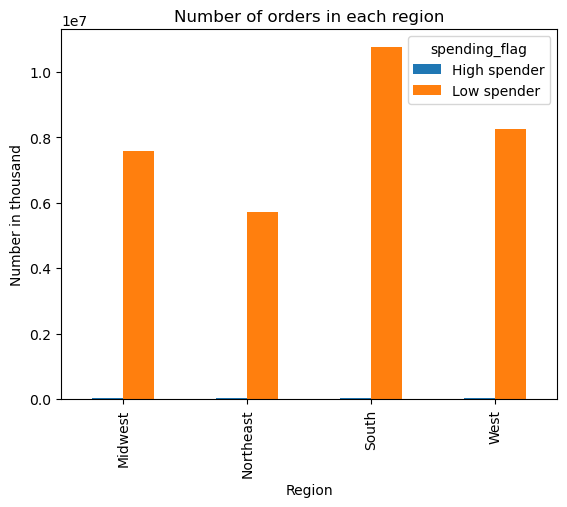

In [59]:
import matplotlib.pyplot as plt

# Create a bar chart
bar4_state = cross_tab.plot.bar()

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number in thousand')
plt.title('Number of orders in each region')

In [133]:
path_2 = r'//Users/franziska/Documents/__CareerFoundry_Data Analyst/4_Exercise_python/__01_Insta_160723/04 Analysis/Visualizations'
# Export bar chart Number of orders in each region
bar4_state.figure.savefig(os.path.join(path_2,'spender_region'))

#### create flag for 'low-activity'

In [61]:
# exclusion flag for low-activity customers
df_final_table.loc[df_final_table['mean_order_flag'] < 5, 'low_activity_flag'] = 'low_spender'

In [62]:
# exclusion flag for high-activity customers
df_final_table.loc[df_final_table['mean_order_flag'] >= 5, 'low_activity_flag'] = 'high_spender'

In [63]:
df_final_table['low_activity_flag'].value_counts(dropna = False)

high_spender    32318881
low_spender        87160
Name: low_activity_flag, dtype: int64

In [64]:
# Create a subset for low_spender customers and exclude them by exporting the new subset
df_low_spender = df_final_table.loc[df_final_table['low_activity_flag'] == 'low_spender']

In [65]:
# difference between high- and low-spender

import scipy.stats as stats  # Import the stats module from SciPy

high_spending_orders = df_final_table[df_final_table['low_activity_flag'] == 'high_spender']
low_spending_orders = df_final_table[df_final_table['low_activity_flag'] == 'low_spender']

# Analyze the most frequently ordered products by gender
top_products_men = high_spending_orders['product_name'].value_counts().head(5)
top_products_women = low_spending_orders['product_name'].value_counts().head(5)

# Perform a chi-squared test to check for significant differences
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df_final_table['low_activity_flag'], df_final_table['product_name']))

# Print the results
print("Top Products High Spender:")
print(top_products_men)
print("\nTop Products Low Spender:")
print(top_products_women)
print("\nChi-squared p-value:", p)

# Determine if there is a significant difference
if p < 0.05:
    print("\nThere is a significant difference in product preferences between High- and Low-spender.")
else:
    print("\nThere is no significant difference in product preferences between High- and Low-spender.")

Top Products High Spender:
Banana                    472350
Bag of Organic Bananas    378750
Organic Strawberries      264375
Organic Baby Spinach      241700
Organic Hass Avocado      213460
Name: product_name, dtype: int64

Top Products Low Spender:
Spring Water           2442
Trail Mix              1976
Clementines            1850
Organic Half & Half    1632
Strawberries           1456
Name: product_name, dtype: int64

Chi-squared p-value: 0.0

There is a significant difference in product preferences between High- and Low-spender.


In [66]:
# Export
df_low_spender.to_pickle(os.path.join(path, 'low_spender.pkl'))

In [67]:
# Exclude low_spender from the dataframe
df_final_table = df_final_table.loc[df_final_table ['low_activity_flag'] == 'high_spender']

In [68]:
# Check frequency
df_final_table['low_activity_flag'].value_counts(dropna = False)

high_spender    32318881
Name: low_activity_flag, dtype: int64

In [ ]:
#### Step 5

#### create age group
###### count in age group | income by age group | busiest day by age group | order by age groups | order hour by age groups

In [69]:
# age groups (have a look a the age)
df_final_table['age'].value_counts(dropna = False)

49    530258
48    528716
79    528206
31    527033
64    526195
       ...  
60    482649
36    482332
66    475682
41    473922
25    469810
Name: age, Length: 64, dtype: int64

In [70]:
# Importing libraries (matplotlib.pyplot,seaborn, scipy)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [71]:
path_2 = r'//Users/franziska/Documents/__CareerFoundry_Data Analyst/4_Exercise_python/__01_Insta_160723/04 Analysis/Visualizations'

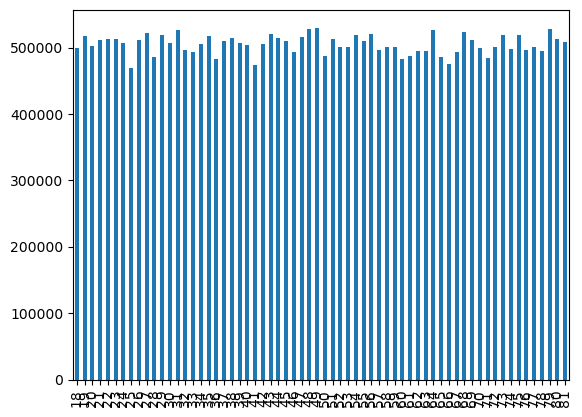

In [72]:
# create age bar chart
bar_age=df_final_table['age'].value_counts().sort_index().plot.bar()

In [73]:
# Define age groups
bins = [ 18, 30, 40, 50, 60, 70, float('inf')]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

In [74]:
# Add a new column to the DataFrame to categorize ages into groups
df_final_table['age_group'] = pd.cut(df_final_table['age'], bins=bins, labels=labels, right=False)

In [75]:
# Count individuals in each age group
age_group_counts = df_final_table['age_group'].value_counts()

In [76]:
age_group_counts

18-30    6074260
71+      6062415
41-50    5096083
31-40    5061671
51-60    5049778
61-70    4974674
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Number of Individuals in Each Age Group')

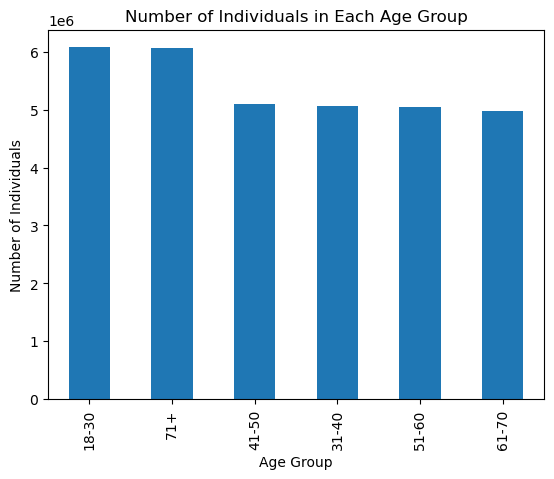

In [77]:
# Create a bar chart
bar5_age = age_group_counts.plot.bar()

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals in Each Age Group')

In [78]:
# Export bar chart age groups
bar5_age.figure.savefig(os.path.join(path_2,'spender_region'))

In [79]:
df_final_table.head()

,order_id,product_id,product_name,prices,department_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,loyalty_flag,mean_order_flag,spending_flag,median_prior_orders,frequency_flag,aisle_id,eval_set,region,low_activity_flag,age_group
0,2539329,196,Soda,9.0,7,1,2,8,NaN,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South,high_spender,31-40
1,2398795,196,Soda,9.0,7,2,3,7,15.0,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South,high_spender,31-40
2,473747,196,Soda,9.0,7,3,3,12,21.0,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South,high_spender,31-40
3,2254736,196,Soda,9.0,7,4,4,7,29.0,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South,high_spender,31-40
4,431534,196,Soda,9.0,7,5,4,15,28.0,1,...,New customer,6.367797,Low spender,20.5,Non-frequent customer,77,prior,South,high_spender,31-40


### retrieve insights

#### check income by age group

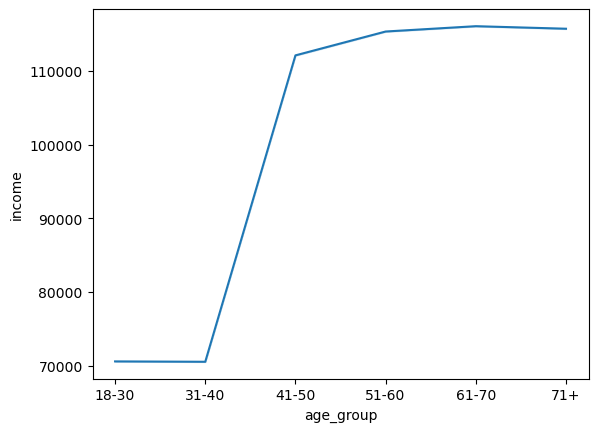

In [80]:
# create a line chart 'age_group','income`
line5 = sns.lineplot(data = df_final_table, x ='age_group', y = 'income')

In [81]:
# Export bar chart age groups
line5.figure.savefig(os.path.join(path_2,'income_age_group'))

#### check date family status by counts

In [82]:
# Count individuals in each age group
fam_status_counts = df_final_table['fam_status'].value_counts()

In [83]:
fam_status_counts

married                             22697328
single                               5310999
divorced/widowed                     2763604
living with parents and siblings     1546950
Name: fam_status, dtype: int64

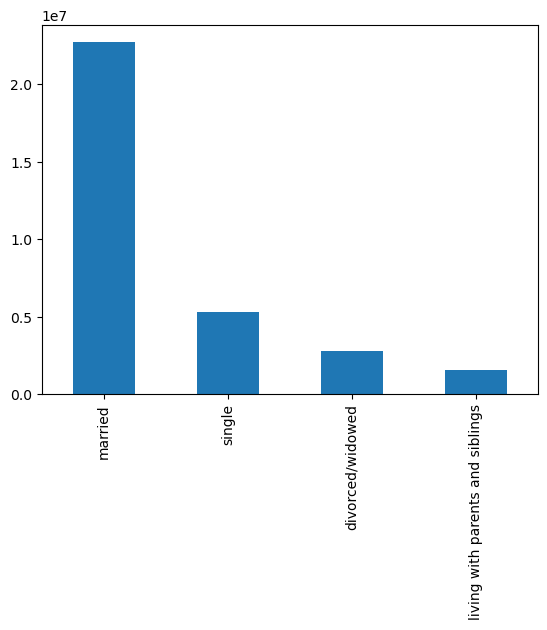

In [84]:
# Create a bar chart
bar6_fam_status = fam_status_counts.plot.bar()

In [85]:
# Export bar chart age groups
bar6_fam_status.figure.savefig(os.path.join(path_2,'bar_fam_status'))

#### check busiest day of the week by age group

In [86]:
# Create a pivot table to get the count of busiest days by age group
pivot_table = pd.pivot_table(df_final_table, columns='order_day_of_week', index='age_group', aggfunc='size', fill_value=0)

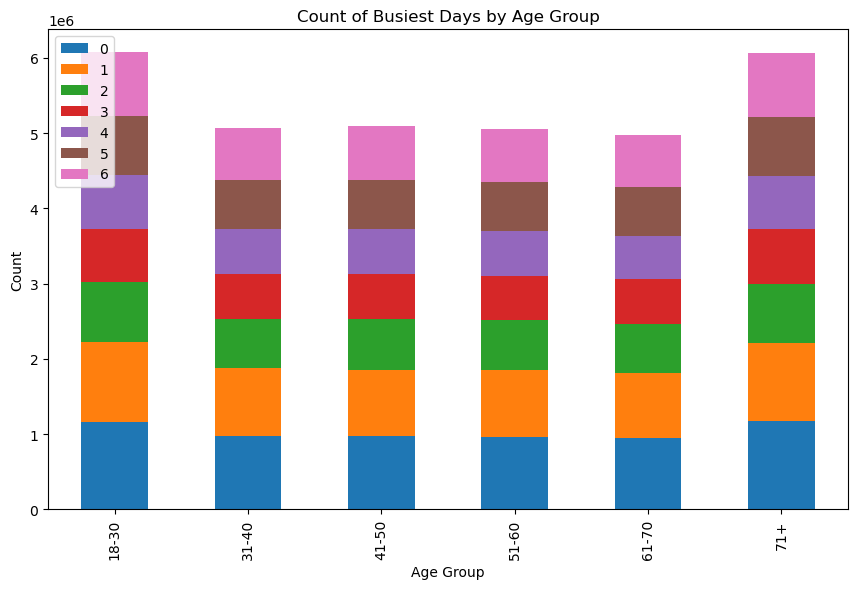

In [87]:
# Create a bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Busiest Days by Age Group')

# Adjust the legend placement
plt.legend(loc='upper left') 

# Reduce the white space around the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure as a PNG file with reduced padding
plt.savefig('bar_chart.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [88]:
# Get the Matplotlib figure from the axes object
fig = ax.get_figure()

In [89]:
# Save the figure to a file
fig.savefig(os.path.join(path_2, 'busiest_day.png'))

#### check department by age group related to 'max_order_flag'

In [90]:
# Group by 'age_group' and 'department_id', then calculate the sum of 'order_count'
grouped = df_final_table.groupby(['age_group', 'department_id'])['max_order_flag'].sum()

In [91]:
print(grouped)

age_group  department_id
18-30      1                12554941
           2                  238962
           3                 7311616
           4                60130947
           5                  943745
                              ...   
71+        17                4217330
           18                2869267
           19               18060968
           20                6351020
           21                 363004
Name: max_order_flag, Length: 126, dtype: int64


In [92]:
# Convert the grouped data into a more readable DataFrame
df_grouped_result = grouped.unstack(fill_value=0)

In [93]:
# see the result
df_grouped_result

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_group,,,,,,,,,,,,,,,,,,,,,
18-30,12554941,238962,7311616,60130947,943745,1651892,16411185,556800,5059704,254265,...,4128418,11283110,4397897,6188594,35011401,4113431,3025865,18025165,6362982,398925
31-40,10537828,176377,6209922,51065589,793727,1342081,13598866,416366,4128485,199594,...,3445542,9426723,3577849,5059548,29549309,3383952,2552156,15256687,5396115,316150
41-50,10619517,173907,6160848,50604362,701094,1353879,14120191,437711,4128988,215753,...,3474762,9500469,3667065,5101521,29483568,3545749,2649529,14755942,5347254,336929
51-60,10696828,184706,6069378,50428686,722328,1315369,14043244,477769,4234094,192308,...,3411860,9341805,3566770,5101211,28477623,3386150,2517948,15092641,5265190,308617
61-70,10581121,179267,6082930,49525044,654977,1285484,13678532,446858,4086104,208276,...,3402507,9324764,3528417,4958188,28109003,3413011,2438561,14585064,5299760,309370
71+,12750234,202996,7333220,60344309,784271,1553116,16964019,556147,4934477,234543,...,4197876,11115791,4297763,5969851,34482735,4217330,2869267,18060968,6351020,363004


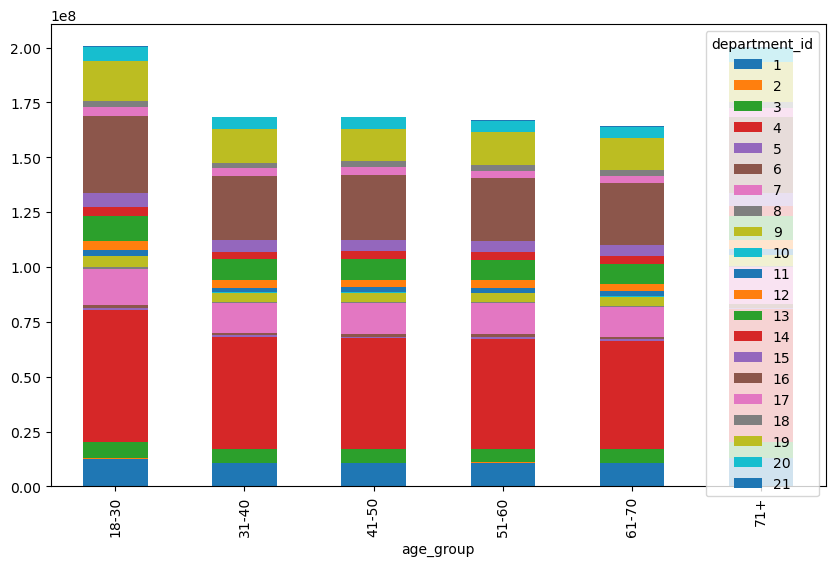

In [94]:
# Create a bar chart
ax = df_grouped_result.plot(kind='bar', stacked=True, figsize=(10, 6))

In [95]:
# Get the Matplotlib figure from the axes object
fig = ax.get_figure()

In [96]:
# Save the figure to a file
fig.savefig(os.path.join(path_2, 'bar_departments'))

#### check highest order within department by age group

In [97]:
# Find the department with the highest order activity within each age group
max_active_departments = grouped.groupby('age_group').idxmax()

In [98]:
max_active_departments

age_group
18-30    (18-30, 4)
31-40    (31-40, 4)
41-50    (41-50, 4)
51-60    (51-60, 4)
61-70    (61-70, 4)
71+        (71+, 4)
Name: max_order_flag, dtype: object

#### check busiest hour by age group related to 'max_order_flag'

In [99]:
# Group by 'age_group' and 'order_hour_of_day', then calculate the sum of 'max_order_flag'
group_hour = df_final_table.groupby(['age_group', 'order_hour_of_day'])['max_order_flag'].sum()

In [100]:
# see the result
print(group_hour)

age_group  order_hour_of_day
18-30      0                    1293787
           1                     679895
           2                     419093
           3                     305009
           4                     335431
                                 ...   
71+        19                   7486971
           20                   6012988
           21                   5108812
           22                   3963754
           23                   2413242
Name: max_order_flag, Length: 144, dtype: int64


In [101]:
# Convert the grouped data into a pivot table for line chart
pivot_table = group_hour.unstack('age_group')

In [102]:
# see the result
pivot_table

age_group,18-30,31-40,41-50,51-60,61-70,71+
order_hour_of_day,,,,,,
0,1293787,1117717,1120593,1073387,1003213,1178939
1,679895,538113,578376,547961,473015,629136
2,419093,327867,332433,278810,302109,416010
3,305009,233008,239585,232227,225184,304878
4,335431,246416,239575,286378,304519,294316
5,570490,436435,457018,479660,485614,584410
6,2130562,1744121,1660827,1670978,1620004,2135283
7,6296664,5124074,4964180,5445622,5156217,6413492
8,11661604,9797921,9908727,9902425,9499305,11828659


Text(0.5, 1.0, 'Line Chart of Max Order Flags by Age Group and Hour of Day')

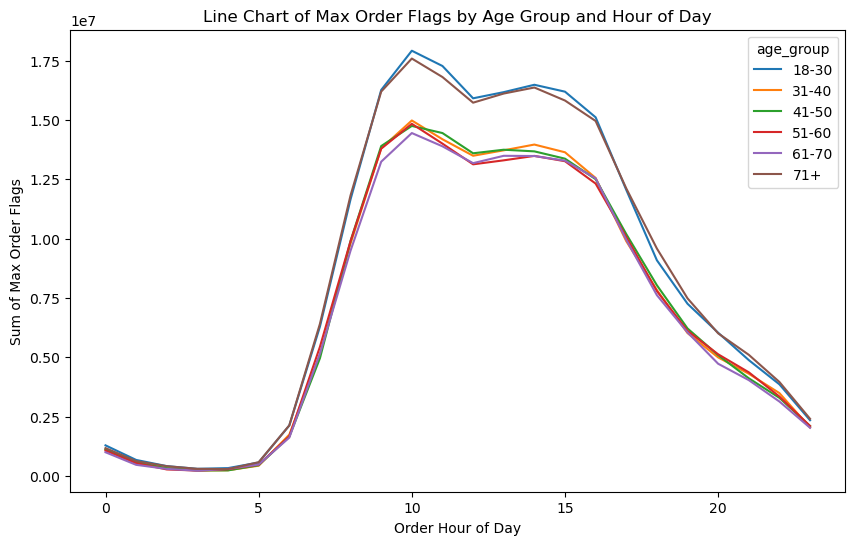

In [103]:
# Plotting as a line chart
ax = pivot_table.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Order Hour of Day')
plt.ylabel('Sum of Max Order Flags')
plt.title('Line Chart of Max Order Flags by Age Group and Hour of Day')

In [104]:
# Save the plot as an image (e.g., PNG)
image_path = os.path.join(path_2, 'line_time_age.png')
ax.figure.savefig(image_path)

# Display the plot
plt.show()

#### check busiest day by age group | related to 'max_order_flag'

In [105]:
# Group by 'age_group' and 'order_day_of_week', then calculate the sum of 'max_order_flag'
group_day = df_final_table.groupby(['age_group', 'order_day_of_week'])['max_order_flag'].sum()

In [106]:
# see the result
print(group_day)

age_group  order_day_of_week
18-30      0                    35916203
           1                    35583712
           2                    26360432
           3                    24343854
           4                    24622043
           5                    27481029
           6                    26281388
31-40      0                    30241309
           1                    30431455
           2                    21942906
           3                    20663274
           4                    20924136
           5                    22909100
           6                    21425095
41-50      0                    29826804
           1                    29593375
           2                    22364186
           3                    20688664
           4                    20807338
           5                    22760376
           6                    22540461
51-60      0                    29869772
           1                    29466835
           2                

In [107]:
# Convert the grouped data into a pivot table for bar chart
pivot_table = group_day.unstack('age_group')

Text(0.5, 1.0, 'Count of Busiest Days by Age Group')

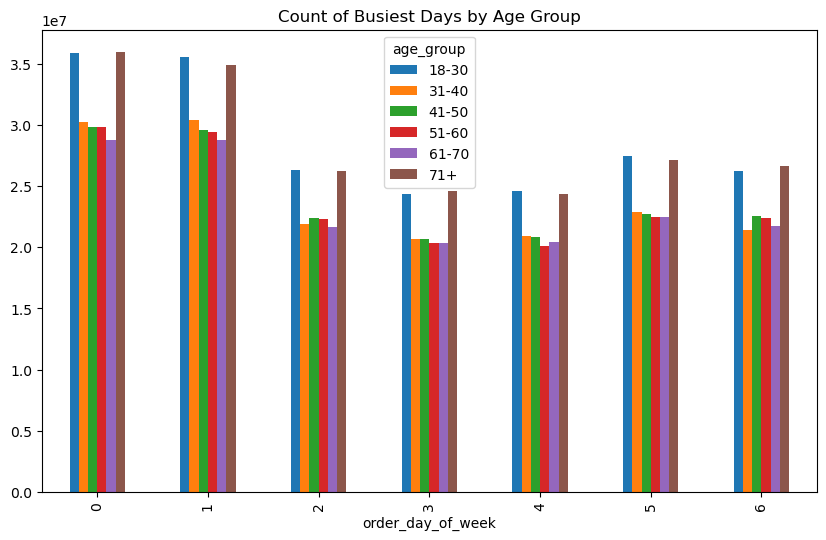

In [108]:
# Plotting as a line chart
ax = pivot_table.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Count of Busiest Days by Age Group')


In [109]:
# Save the plot as an image (e.g., PNG)
image_path = os.path.join(path_2, 'bar_day_age.png')
ax.figure.savefig(image_path)

# Display the plot
plt.show()

#### check family status
###### busiest day fam_status | price range by fam_status | dependants by fam_status

In [110]:
# Create a pivot table to get the count of busiest days by age group
pivot_table = pd.pivot_table(df_final_table, index='fam_status', columns='busiest_day', aggfunc='size', fill_value=0)

In [111]:
# see the result
print(pivot_table)

busiest_day                       Busiest day  Least busy  Regularly busy
fam_status                                                               
divorced/widowed                       528021      319775         1915808
living with parents and siblings       294935      180328         1071687
married                               4353873     2648936        15694519
single                                1020615      622042         3668342


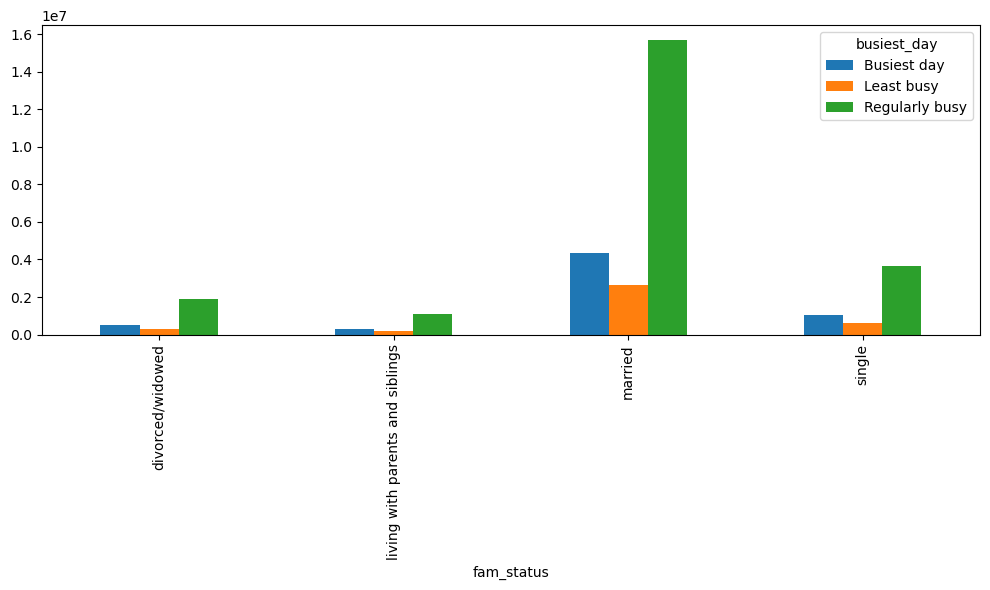

In [112]:
# Plotting as a line chart
ax = pivot_table.plot(kind='bar', figsize=(10, 6))
# Adjust layout to prevent the title from being cut off
plt.tight_layout()

In [113]:
# Save the plot as an image (e.g., PNG)
image_path = os.path.join(path_2, 'bar_fam_status')
ax.figure.savefig(image_path)

# Display the plot
plt.show()

In [114]:
# Create a pivot table to get the count of fam_status and age by age group
pivot_table = pd.pivot_table(df_final_table, index='fam_status', columns='price_range_flag', aggfunc='size', fill_value=0)

In [115]:
# see the result
print(pivot_table)

price_range_flag                  High range product  Low-range product  \
fam_status                                                                
divorced/widowed                               35303             860639   
living with parents and siblings               19764             481104   
married                                       291795            7073400   
single                                         65636            1655902   

price_range_flag                  Mid-range product  
fam_status                                           
divorced/widowed                            1867662  
living with parents and siblings            1046082  
married                                    15332133  
single                                      3589461  


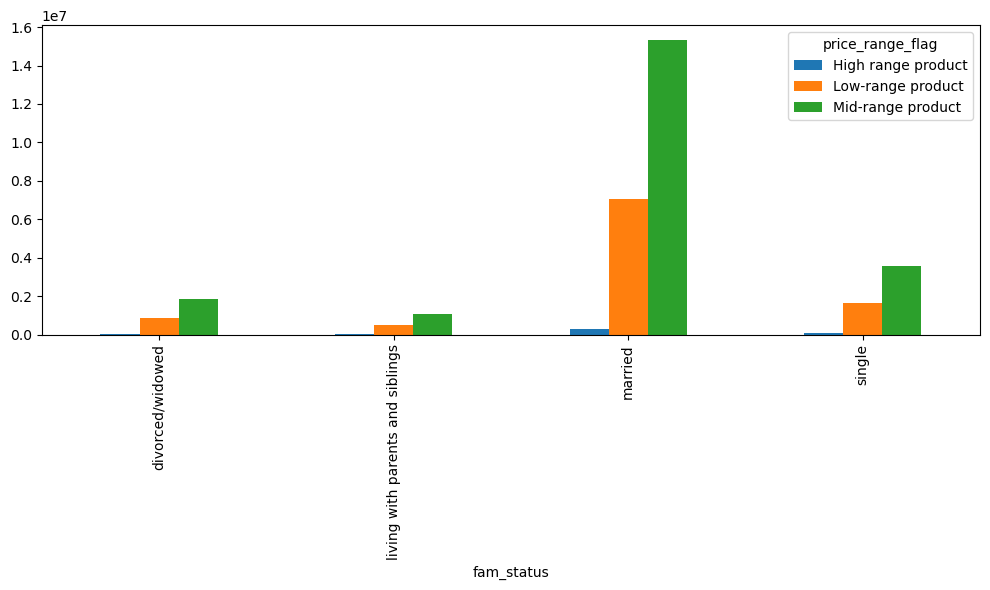

In [116]:
# Plotting as a line chart
ax = pivot_table.plot(kind='bar', figsize=(10, 6))
# Adjust layout to prevent the title from being cut off
plt.tight_layout()

In [117]:
# Save the plot as an image (e.g., PNG)
image_path = os.path.join(path_2, 'bar_fam_status_range_product')
ax.figure.savefig(image_path)

# Display the plot
plt.show()

In [118]:
# Create a pivot table to get the count of fam_status and age by age group
pivot_table = pd.pivot_table(df_final_table, index='fam_status', columns='n_dependants', aggfunc='size', fill_value=0)

In [119]:
# see the result
print(pivot_table)

n_dependants                            0        1        2        3
fam_status                                                          
divorced/widowed                  2763604        0        0        0
living with parents and siblings        0   528956   507015   510979
married                                 0  7532119  7563149  7602060
single                            5310999        0        0        0


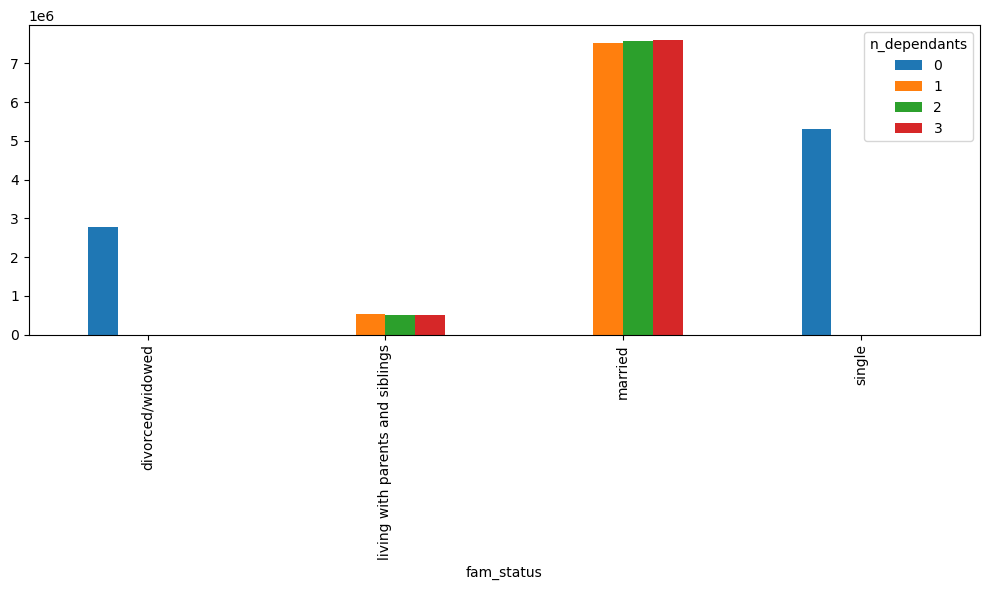

In [120]:
# Plotting as a line chart
ax = pivot_table.plot(kind='bar', figsize=(10, 6))

# Adjust layout to prevent the title from being cut off
plt.tight_layout()

In [121]:
# Save the plot as an image (e.g., PNG)
image_path = os.path.join(path_2, 'bar_fam_status_dependants')
ax.figure.savefig(image_path)

# Display the plot
plt.show()

#### check income by reordered

In [122]:
# Create a pivot table to get the count of fam_status and age by age group
pivot_table = pd.pivot_table(df_final_table, index='fam_status', columns='reordered', aggfunc='size', fill_value=0)

In [123]:
# see the result
print(pivot_table)

reordered                               0         1
fam_status                                         
divorced/widowed                  1133387   1630217
living with parents and siblings   633021    913929
married                           9328502  13368826
single                            2175493   3135506


In [124]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32318881 entries, 0 to 32406040
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   product_name            object  
 3   prices                  float64 
 4   department_id           int64   
 5   order_number            int64   
 6   order_day_of_week       int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   add_to_cart_order       int64   
 10  user_id                 int64   
 11  date_joined             object  
 12  first_name              object  
 13  surname                 object  
 14  gender                  category
 15  age                     int64   
 16  fam_status              object  
 17  n_dependants            int64   
 18  income                  int64   
 19  state                   object  
 20  busiest_period_of_day   object  
 21  busies

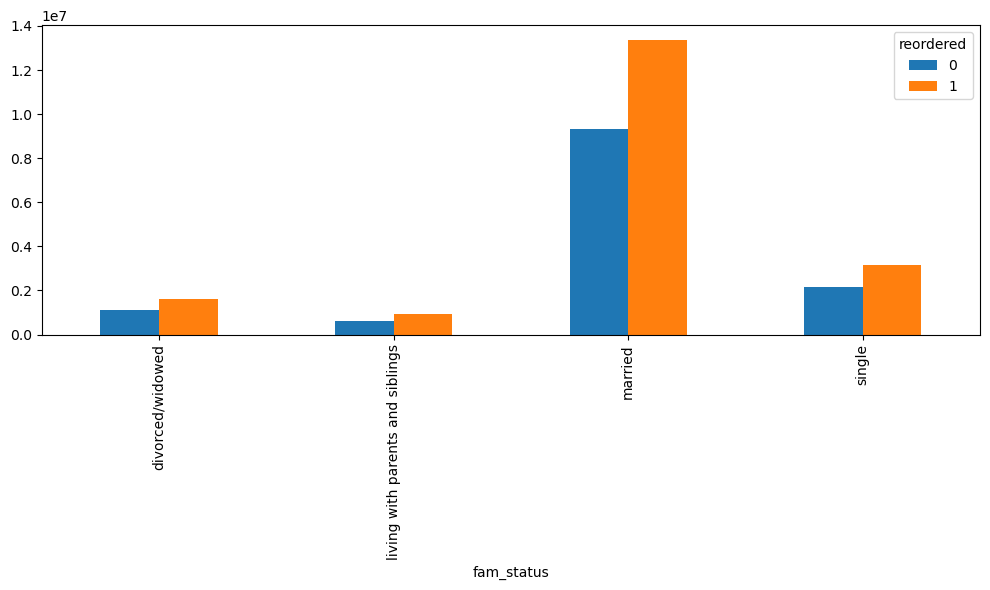

In [125]:
# Plotting as a bar chart
ax = pivot_table.plot(kind='bar', figsize=(10, 6))

# Adjust layout to prevent the title from being cut off
plt.tight_layout()

In [129]:
# Specify the column name to analyze
order_number = 'order_number'

# Calculate the maximum, minimum, and mean values for the specified column
max_value = df_final_table[order_number].max()
min_value = df_final_table[order_number].min()
mean_value = df_final_table[order_number].mean()

# Print all three results in a single print statement
print(f"Statistics for '{order_number}':")
print(f"  Maximum value: {max_value}")
print(f"  Minimum value: {min_value}")
print(f"  Mean value: {mean_value}")

Statistics for 'order_number':
  Maximum value: 99
  Minimum value: 1
  Mean value: 17.154899298648367


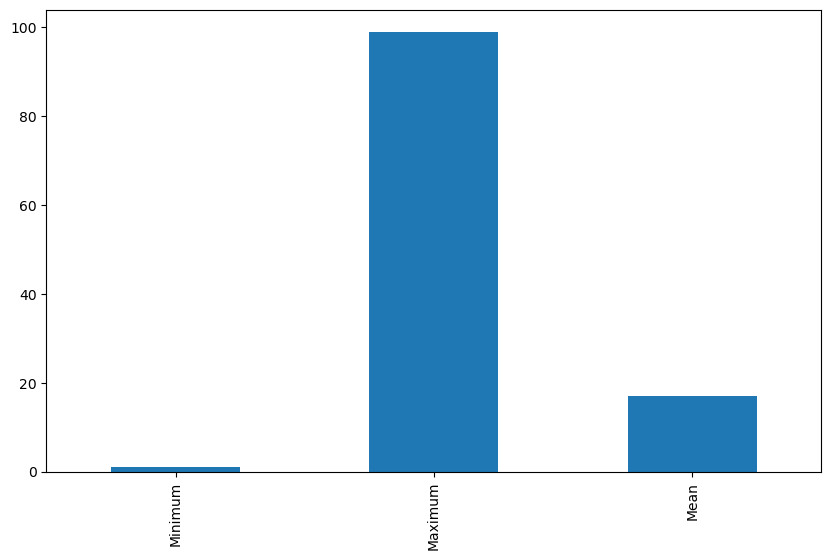

In [130]:
min_value = 1
max_value = 99
mean_value = 17.142232060991343

# Create a DataFrame containing the calculated values
result_data = pd.Series([min_value, max_value, mean_value], index=['Minimum', 'Maximum', 'Mean'])

# Plotting the data as a bar chart
ax = result_data.plot(kind='bar', figsize=(10, 6))

In [ ]:
# Export data to pkl

df_final_table.to_pickle(os.path.join(path, 'df_final_table_part_2.pkl'))

#### check Part 2, delves even deeper into the world of data analysis